# Callin Switzer
## Compare NNet preds with Jorge's solutions
## 2 Sept 2018

In [309]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import os
import pandas as pd
import time
from datetime import datetime
import sys
import csv
import seaborn as sns
import scipy.io
import subprocess
import csv

print(sys.version, "\n")

now = datetime.now()
print("last run on " + str(now))

#%qtconsole

# define directories
baseDir = os.getcwd()
dataDir = r'D:\MothSimulations\11c-AggressiveManeuver\Qstore\hws_am_con'
figDir = r'D:\Dropbox\mothMachineLearning_dataAndFigs\Figs'
dataOutput = r'D:\Dropbox\mothMachineLearning_dataAndFigs\DataOutput'
savedModels = r'D:\Dropbox\mothMachineLearning_dataAndFigs\savedModels'
if not os.path.exists(dataOutput):
    os.mkdir(dataOutput)

if not os.path.exists(savedModels):
    os.mkdir(savedModels)

3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)] 

last run on 2018-09-02 16:07:06.490413


In [312]:
# check to make sure it aligns with my original dataset
orDat= pd.read_csv(os.path.join(dataOutput, "NNpreds.csv"))

In [313]:
orDat.head()

,x_0,y_0,phi_0,theta_0,x_dot_0,y_dot_0,phi_dot_0,theta_dot_0,F_pred,alpha_pred,tau_pred,x_99,y_99,phi_99,theta_99,x_dot_99_pred,y_dot_99_pred,phi_dot_99_pred,theta_dot_99_pred
0,0.262194,-9.544672,5.224991,0.777590,-46.852167,-0.677334,-0.296395,-0.268426,36046.0040,3.557195,86448.84,-2.649455,-16.019851,5.293197,0.969371,-227.155460,-651.43800,7.388257,13.609400
1,0.075806,7.723757,4.110861,0.778734,340.169458,81.327298,-1.458512,-1.615854,29249.3800,5.195285,-17680.14,11.802986,7.446455,4.030211,0.675778,834.259160,-118.34230,-6.747110,-7.881252
2,-0.067851,-9.288991,3.995672,0.781264,69.075129,233.945205,-0.271714,3.114568,9240.1290,4.872288,48568.76,2.685157,-5.772373,3.973297,0.828877,205.397450,119.78773,-1.961641,1.506449
3,-0.278383,5.935364,4.131035,0.793421,4.855971,-160.095031,0.493889,-0.485404,38036.5660,3.449874,-25356.29,-3.346734,-3.568742,4.140354,0.767586,-316.916300,-788.68823,0.443989,-1.335863
4,-0.790712,6.862221,3.998543,0.788970,21.196818,221.980546,1.761272,1.654365,7563.6387,4.037069,35999.10,-0.126487,9.712942,4.020153,0.862082,45.035244,66.17256,0.558920,3.127698


In [314]:
# read in data
predWSim = pd.read_csv(os.path.join(dataOutput, "NNpreds_output_all_w_sim.csv") )

In [315]:
# remove empty column
predWSim.dropna(axis = 1, inplace= True)

In [316]:
predWSim.head()

,x_0,y_0,phi_0,theta_0,x_dot_0,y_dot_0,phi_dot_0,theta_dot_0,F_pred,alpha_pred,...,phi_dot_99_pred,theta_dot_99_pred,x_a,y_a,phi_a,theta_a,x_dot_a,y_dot_a,phi_dot_a,theta_dot_a
0,0.262190,-9.5447,5.2250,0.77759,-46.852,-0.67733,-0.29639,-0.26843,36046.0,3.5572,...,7.38830,13.6090,-2.6685,-16.0590,5.2938,0.96960,-229.060,-652.580,7.36040,13.5230
1,0.075806,7.7238,4.1109,0.77873,340.170,81.32700,-1.45850,-1.61590,29249.0,5.1953,...,-6.74710,-7.8813,11.8570,7.4454,4.0298,0.67493,834.940,-118.180,-6.73180,-7.8699
2,-0.067851,-9.2890,3.9957,0.78126,69.075,233.95000,-0.27171,3.11460,9240.1,4.8723,...,-1.96160,1.5064,2.6830,-5.7646,3.9734,0.82882,206.650,119.660,-1.95060,1.5404
3,-0.278380,5.9354,4.1310,0.79342,4.856,-160.10000,0.49389,-0.48540,38037.0,3.4499,...,0.44399,-1.3359,-3.3660,-3.5855,4.1404,0.76773,-315.740,-790.600,0.44304,-1.3167
4,-0.790710,6.8622,3.9985,0.78897,21.197,221.98000,1.76130,1.65440,7563.6,4.0371,...,0.55892,3.1277,-0.1489,9.7200,4.0204,0.86236,43.155,65.532,0.57572,3.1531


In [317]:
# Check that items are aligned
np.allclose(orDat.iloc[:, 0:10], predWSim.iloc[:, 0:10], rtol = 1e-04)

True

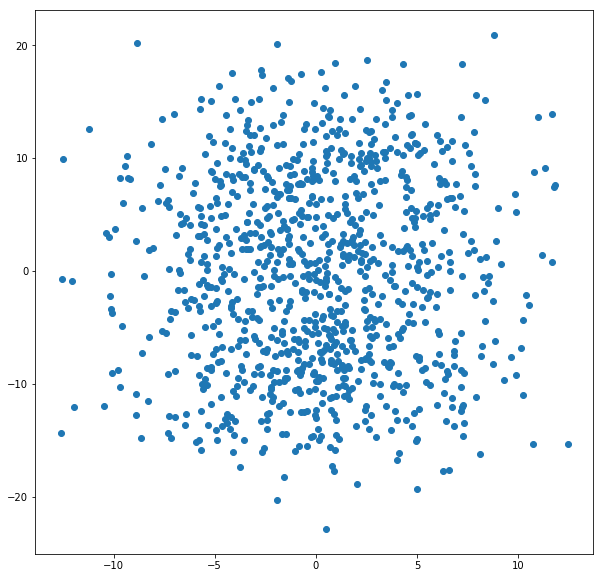

In [337]:
# plot predicted vs. actual
plt.figure(figsize = [10,10])
plt.scatter(x = predWSim.loc[0:1000, "x_99"], y = predWSim.loc[0:1000,  "y_99"])
#plt.scatter(x = predWSim.loc[:, "x_a"], y = predWSim.loc[:,  "y_a"], alpha = 1)
#plt.close() # makes fig not show

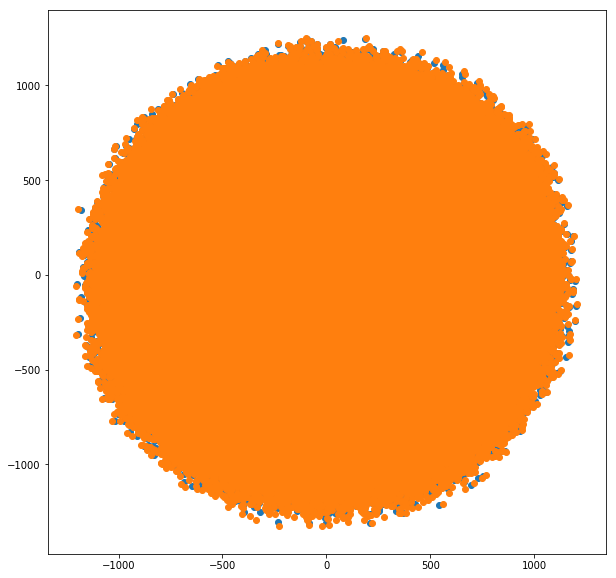

In [338]:
# plot predicted vs. actual
plt.figure(figsize = [10,10])
plt.scatter(x = predWSim.loc[:, "x_dot_99_pred"], y = predWSim.loc[:,  "y_dot_99_pred"])
plt.scatter(x = predWSim.loc[:, "x_dot_a"], y = predWSim.loc[:,  "y_dot_a"], alpha = 1)

Text(0.5,0,'predicted')

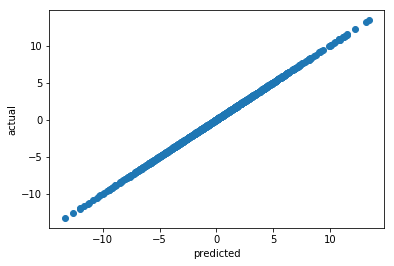

In [125]:
plt.scatter(x = predWSim.loc[:, "x_99"], y =  predWSim.loc[:,  "x_a"] )
plt.ylabel("actual")
plt.xlabel("predicted")
#plt.hlines(y = 0, xmin = -10, xmax = 10)


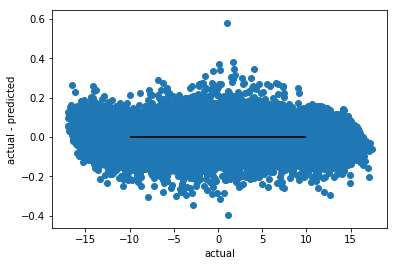

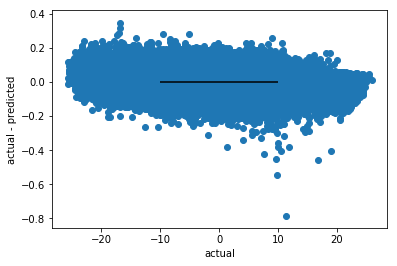

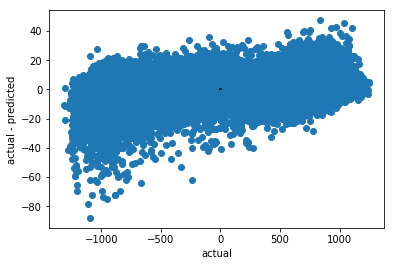

In [319]:
plt.scatter(x = predWSim.loc[:, "x_99"], y =  predWSim.loc[:,  "x_a"] -predWSim.loc[:, "x_99"] )
plt.ylabel("actual - predicted")
plt.xlabel("actual")
plt.hlines(y = 0, xmin = -10, xmax = 10)

plt.show()
plt.scatter(x = predWSim.loc[:, "y_99"], y =  predWSim.loc[:,  "y_a"] -predWSim.loc[:, "y_99"] )
plt.ylabel("actual - predicted")
plt.xlabel("actual")
plt.hlines(y = 0, xmin = -10, xmax = 10)

plt.show()
plt.scatter(x = predWSim.loc[:, "y_dot_99_pred"], y =  predWSim.loc[:,  "y_dot_a"] -predWSim.loc[:, "y_dot_99_pred"] )
plt.ylabel("actual - predicted")
plt.xlabel("actual")
plt.hlines(y = 0, xmin = -10, xmax = 10)

In [320]:
predsNames = ["_".join(jj.split("_")[0:3])  for jj in predWSim.columns[11:19]]
actualNames = ["_".join(jj.split("_")[0:-1]) + "_actual" for jj in predWSim.columns[19:]]
nms = [predsNames[ii][0:len(predsNames[ii])-3] + "_final" for ii in range(len(predsNames))]
print(predsNames)
print(actualNames)

['x_99', 'y_99', 'phi_99', 'theta_99', 'x_dot_99', 'y_dot_99', 'phi_dot_99', 'theta_dot_99']
['x_actual', 'y_actual', 'phi_actual', 'theta_actual', 'x_dot_actual', 'y_dot_actual', 'phi_dot_actual', 'theta_dot_actual']


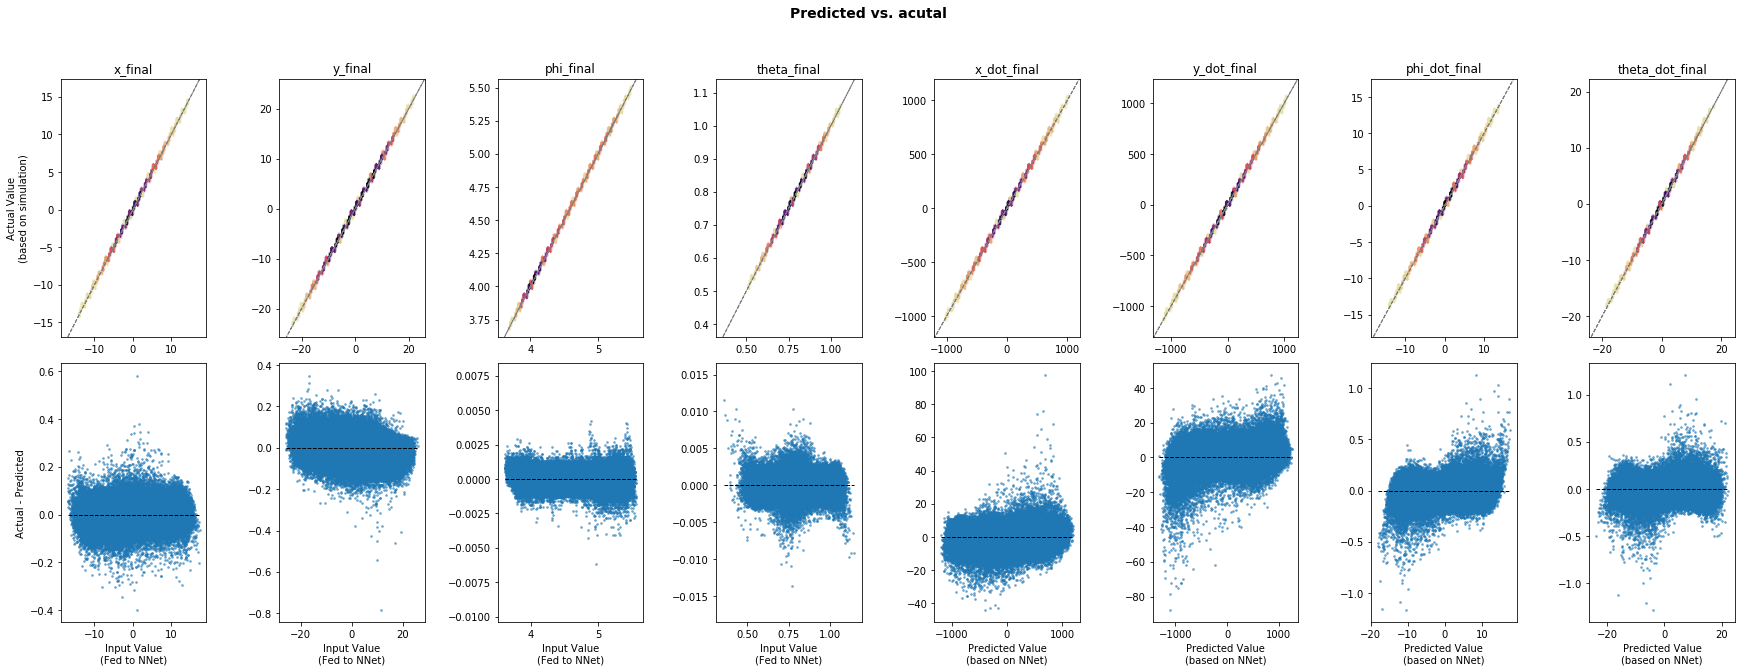

In [321]:
# make plots
plt.close("all")
fig, axs = plt.subplots(2,8, figsize=(30, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.1, wspace=0.5)
fig.suptitle('Predicted vs. acutal ', fontsize=14, fontweight='bold')

axs = axs.ravel()

# replace lightest colors with white
import matplotlib.colors

cmap = plt.cm.magma_r
cmaplist = np.array([cmap(i) for i in range(cmap.N)])
cmaplist[:,0:3] = np.divide(cmaplist[:, 0:3], 1.1)
cmaplist[0] = (1,1,1,0.5)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('mcm',cmaplist, cmap.N)

for ii in range(len(predsNames)):
    try:
        axs[ii].hexbin(y = predWSim.iloc[:,ii+11],x = predWSim.iloc[:,ii+ 19], gridsize = 50, cmap = cmap)
        #axs[ii].set_xlabel("Predicted Value\n(unscaled)")
        if(ii == 0):
            axs[ii].set_ylabel("Actual Value\n(based on simulation)")
        axs[ii].set_title(nms[ii])
        axs[ii].plot(predWSim.iloc[:,ii+11], predWSim.iloc[:,ii+11], 'grey', linewidth = 1, linestyle  = "--")
    except:
        pass

# residual plots x = predicted, y = actual - predicted
for jj in np.arange(0, len(predsNames)):
    
    ii = jj + 8
    try:
        axs[ii].scatter(x = predWSim.iloc[:,jj+11],
                     y = predWSim.iloc[:,jj+ 19 ] - predWSim.iloc[:,jj+11], s = 3, alpha = 0.5)
        
        if(jj > 3):
            axs[ii].set_xlabel("Predicted Value\n(based on NNet)")
        else:
            axs[ii].set_xlabel("Input Value\n(Fed to NNet)")
        if(jj == 0):
            axs[ii].set_ylabel("Actual - Predicted")
        axs[ii].hlines(y = 0, xmin = np.min(predWSim.iloc[:,jj+11]), 
                       xmax = np.max(predWSim.iloc[:,jj+11]), linestyle =  "--", linewidth = 1)

        
    except:
        pass

fig.savefig(os.path.join(figDir, "PredVActual_Sim_big.png"), dpi = 120, bbox_inches='tight')
plt.close()

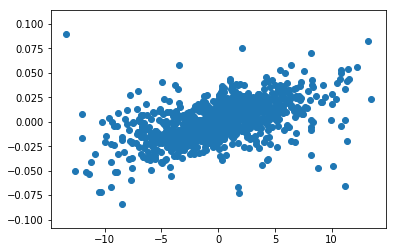

In [213]:

plt.scatter(x = predWSim.x_99,
                     y = predWSim.x_a - predWSim.x_99)

In [233]:
# check how many inputs were in the training set

In [322]:
dataDir2 = r"D:\Dropbox\mothMachineLearning_dataAndFigs\DataOutput"
trainDF2 = pd.read_csv(os.path.join(dataDir2, "smallDF.csv"))
trainDF2.head()

,simNum,timestep,F,alpha,phi_0,phi_99,phi_dot_0,phi_dot_99,tau,theta_0,...,x_0,x_99,x_dot_0,x_dot_99,y_0,y_99,y_dot_0,y_dot_99,Fx,Fy
0,0,0,38304.433962,5.340270,3.926991,3.869604,0.000000,-5.674295,10963.268558,0.785398,...,0.000000,6.853314,0.000100,683.734561,0.000000,-1.298536,0.000100,-133.752363,22501.211072,-30998.792903
1,0,1,34264.536249,2.465501,3.948428,4.019544,2.009397,5.425513,72580.767201,0.768478,...,-0.019322,-6.079672,-0.145396,-606.129200,2.520087,6.366770,250.908304,120.273149,-26727.166452,21441.012519
2,0,2,12045.791872,4.573819,3.966608,3.933017,-0.124272,-2.775517,93435.855346,0.768515,...,0.509507,2.986736,52.490438,193.914740,4.834518,2.470847,-18.848146,-211.050011,-1663.845687,-11930.327714
3,0,3,35562.854879,0.767089,4.000007,4.111777,3.434103,7.246049,-96088.338473,0.773977,...,-0.836633,-4.334782,-187.046694,-157.064454,6.838940,17.508792,218.755312,844.589134,25602.909376,24682.132781
4,0,4,20856.636628,2.424378,4.009324,3.995061,-2.309667,0.686804,-27142.805375,0.815904,...,0.429770,2.895126,313.730247,-65.350386,8.392823,6.771320,-58.222983,-102.458917,-15718.389244,13708.812166


In [323]:
X = trainDF2.loc[:, ["x_0", "y_0", "phi_0", "theta_0", 
                    "x_99", "y_99", "phi_99", "theta_99", 
                   "x_dot_0", "y_dot_0", "phi_dot_0", "theta_dot_0"]]

Y = trainDF2.loc[:, ["Fx", "Fy", "tau", "x_dot_99", "y_dot_99", 
                    "phi_dot_99", "theta_dot_99"] ]

In [324]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state = 123)

In [325]:
Xtrain.shape

(8000000, 12)

In [333]:
# check for duplicates in xtrain and xtest -- no exact duplicates
aa = Xtrain.merge(Xtest, how="inner")
print(aa.shape)
print(aa.drop_duplicates().shape)
aa.head()

(0, 12)
(0, 12)


,x_0,y_0,phi_0,theta_0,x_99,y_99,phi_99,theta_99,x_dot_0,y_dot_0,phi_dot_0,theta_dot_0


In [345]:
# check just initial conditions w/0 derivatives -- all are in test set
aa = Xtrain.iloc[:, 0:4].drop_duplicates().merge(Xtest.iloc[:,0:4].drop_duplicates(), how="inner")
print(aa.shape)
print(aa.drop_duplicates().shape)
aa.head()

(3961, 4)
(3961, 4)


,x_0,y_0,phi_0,theta_0
0,0.607985,-8.415591,4.386486,0.775450
1,-0.447417,6.160750,4.132365,0.824572
2,-0.252101,2.563958,3.950323,0.787410
3,-0.154377,5.904717,4.456793,0.811417
4,-0.516687,2.445152,4.883818,0.770185


In [339]:
Xtrain.iloc[:, 0:5].head()

,x_0,y_0,phi_0,theta_0,x_99
6035521,0.607985,-8.415591,4.386486,0.775450,7.788202
5478110,-0.447417,6.160750,4.132365,0.824572,7.406326
9172476,-0.252101,2.563958,3.950323,0.787410,2.554667
7730660,-0.154377,5.904717,4.456793,0.811417,1.151407
2597551,-0.516687,2.445152,4.883818,0.770185,-12.399359


In [326]:
trainDF2.x_0.nunique(), Xtrain.x_0.nunique()

(3961, 3961)

In [327]:
trainDF2.y_99.nunique(), Xtrain.y_99.nunique()

(10000000, 8000000)

In [328]:
comparDF = Xtrain.loc[:, ['x_0', 'y_0', 'phi_0', 'theta_0', 'x_dot_0', 'y_dot_0',
       'phi_dot_0', 'theta_dot_0']]
len(comparDF)

8000000

In [329]:
comparDF.drop_duplicates(inplace=True)

In [330]:
comparDF.shape

(3961, 8)

In [331]:
cdf2 = orDat.loc[:, comparDF.columns]#.drop_duplicates()

In [332]:
print(cdf2.shape)
cdf2.head()

(2000000, 8)


,x_0,y_0,phi_0,theta_0,x_dot_0,y_dot_0,phi_dot_0,theta_dot_0
0,0.262194,-9.544672,5.224991,0.777590,-46.852167,-0.677334,-0.296395,-0.268426
1,0.075806,7.723757,4.110861,0.778734,340.169458,81.327298,-1.458512,-1.615854
2,-0.067851,-9.288991,3.995672,0.781264,69.075129,233.945205,-0.271714,3.114568
3,-0.278383,5.935364,4.131035,0.793421,4.855971,-160.095031,0.493889,-0.485404
4,-0.790712,6.862221,3.998543,0.788970,21.196818,221.980546,1.761272,1.654365


In [293]:
# lots of our starting conditions are also in the training set ~ 592/1000

aa = cdf2.merge(comparDF, how="inner")
print(aa.shape)
print(aa.drop_duplicates().shape)
aa.head()

(592, 8)
(528, 8)


,x_0,y_0,phi_0,theta_0,x_dot_0,y_dot_0,phi_dot_0,theta_dot_0
0,-0.175529,-9.134107,4.179852,0.758890,-103.369305,207.078747,0.423640,-1.295636
1,-1.284695,9.445257,3.907974,0.809876,115.978793,-227.698278,-2.307028,-3.329711
2,-0.109495,-8.961007,4.131253,0.749214,-309.100645,74.236008,4.862691,1.878473
3,0.371638,-8.266666,4.550662,0.781034,0.916168,-170.521750,2.288257,-0.463663
4,-0.551570,-8.504025,4.110607,0.782265,19.564260,177.090164,0.231638,0.885469


In [282]:
comparDF.loc[comparDF.x_0 == aa.iloc[0,0],:]

,x_0,y_0,phi_0,theta_0,x_dot_0,y_dot_0,phi_dot_0,theta_dot_0
9733667,-0.175529,-9.134107,4.179852,0.75889,-103.369305,207.078747,0.42364,-1.295636


In [301]:
comparDF = Xtrain.loc[:, ['x_0', 'y_0', 'phi_0', 'theta_0', 
                          'x_dot_0', 'y_dot_0','phi_dot_0', 'theta_dot_0', 
                          "x_99", "y_99", "phi_99", "theta_99"]].drop_duplicates()
cdf2 = orDat.loc[:, comparDF.columns]#.drop_duplicates()

In [303]:
comparDF.shape

(8000000, 12)

In [304]:
bb = pd.merge(cdf2, comparDF, how='inner')
print(bb.shape)
print(bb.drop_duplicates().shape)
bb.head()

(0, 12)
(0, 12)


,x_0,y_0,phi_0,theta_0,x_dot_0,y_dot_0,phi_dot_0,theta_dot_0,x_99,y_99,phi_99,theta_99


In [264]:
np.sum(cdf2.x_0.isin(comparDF.x_0) & cdf2.y_0.isin(comparDF.y_0) & cdf2.y_99_pred.isin(comparDF.y_99))

AttributeError: 'DataFrame' object has no attribute 'y_99_pred'